# <span style="color:#756bb1">Proprietà degli Stimatori</span>

![Screenshot 2023-12-31 at 15.15.34.png](<attachment:Screenshot 2023-12-31 at 15.15.34.png>)
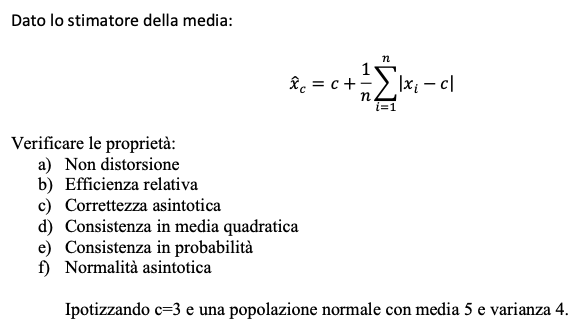

#### <span style="color:#3182bd">Parameters</span>

In [2]:
set.seed(123)  # Impostiamo un seed per la riproducibilità

# Definiamo la dimensione del campione
n <- 100

# Numero di simulazioni
num_simulazioni <- 1000

# Parametri della distribuzione (ad esempio, una distribuzione normale)
media_vera <- 5
deviazione_standard <- 2

#### <span style="color:#3182bd">Funzione</span>

In [3]:
# Creiamo una funzione per calcolare lo stimatore ad hoc per un campione
stimatore_adhoc <- function(campioni, c) {
  return(c + mean(abs(campioni - c)))
}

# Simuliamo il processo di campionamento e calcoliamo gli stimatori ad hoc
# ? replicate
stimatori_adhoc <- replicate(num_simulazioni, {
  campione <- rnorm(n, mean = media_vera, sd = deviazione_standard)
  stimatore_adhoc(campione, 3)  # Utilizziamo c = 3 come esempio
})

stimatori_adhoc[1:10]

[1] 5.370183 5.062084 5.403083 5.337863 5.558237 5.218495 5.193482 5.600293
 [9] 5.466539 5.286933

## <span style="color:#e6550d">Non Distorsione (correttezza) </span>

![Screenshot 2023-12-31 at 16.05.31.png](<attachment:Screenshot 2023-12-31 at 16.05.31.png>)
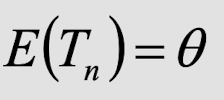

In [10]:
# Calcoliamo la media degli stimatori ad hoc su tutte le simulazioni
media_stimatori_adhoc <- mean(stimatori_adhoc)

# Verifichiamo se la media degli stimatori ad hoc si avvicina a mu (non distorto)
cat("Media vera:", media_vera, "\n")
cat("Media stimatori ad hoc:", media_stimatori_adhoc, "\n")
cat("Distorsione:", media_stimatori_adhoc - media_vera, "\n")

Media vera: 5 
Media stimatori ad hoc: 5.335167 
Distorsione: 0.3351666 


## <span style="color:#e6550d">Efficienza Relativa</span>

![Screenshot 2023-12-31 at 15.21.57.png](<attachment:Screenshot 2023-12-31 at 15.21.57.png>)
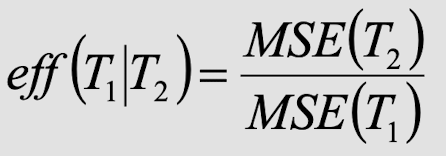

In [5]:
# Creiamo una funzione per calcolare la varianza di uno stimatore
calcola_varianza_stimatore <- function(stimatori, valore_vero) {
  return(mean((stimatori - valore_vero)^2))
}

# Calcoliamo la varianza dello stimatore ad hoc e della media campionaria
varianza_stimatore_adhoc <- calcola_varianza_stimatore(stimatori_adhoc, media_vera)

# Calcoliamo la  varianza di uno stimatore efficiente (media campionaria)
# che e' la minima che si puo' ottenere
varianza_media_campionaria <- deviazione_standard^2 / n

# Verifichiamo l'efficienza confrontando le varianze
cat("Varianza stimatore ad hoc:", varianza_stimatore_adhoc, "\n")
cat("Varianza media campionaria:", varianza_media_campionaria, "\n")

# Facciamo il rapporto tra le varianze per verificare l'efficienza
cat("Rapporto tra le varianze:", varianza_stimatore_adhoc / varianza_media_campionaria, "\n")
if(varianza_stimatore_adhoc / varianza_media_campionaria < 1) {
  cat("Lo stimatore ad hoc è efficiente\n")
} else {
  cat("Lo stimatore ad hoc non è efficiente\n")
}

Varianza stimatore ad hoc: 0.1355917 
Varianza media campionaria: 0.04 
Rapporto tra le varianze: 3.389792 
Lo stimatore ad hoc non `e efficiente


## <span style="color:#e6550d">Correttezza Asintotica</span>

![Screenshot 2023-12-31 at 15.22.17.png](<attachment:Screenshot 2023-12-31 at 15.22.17.png>)
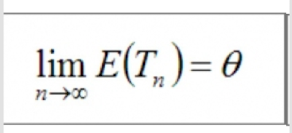

Media stimatori: 5.334213 
Media vera: 5 
Distorsione: 0.3342129 
Lo stimatore `e asintoticamente distorto


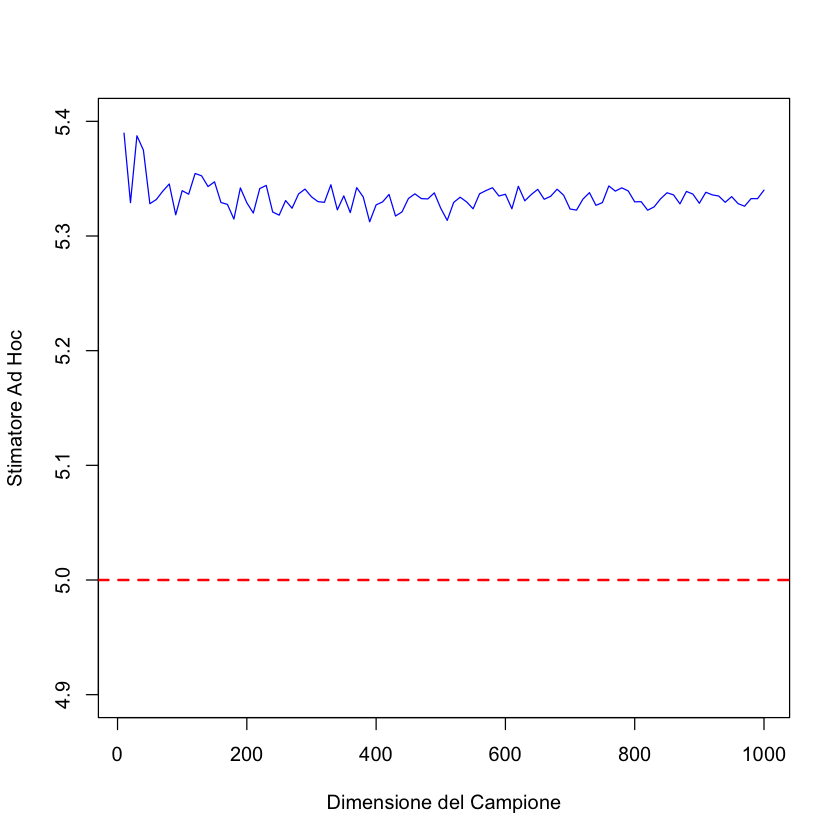

In [6]:
par(bg = 'white')
# Dimensioni del campione da 10 a 1000 con incrementi di 10
dimensioni_campioni <- seq(10, 1000, by = 10)

# Numero di simulazioni
num_simulazioni <- 100

# Inizializziamo un vettore per memorizzare le stime
stimate <- numeric(length(dimensioni_campioni))

# Simuliamo il processo di campionamento per diverse dimensioni del campione
for (i in seq_along(dimensioni_campioni)) {
    n <- dimensioni_campioni[i]
  
    # Simuliamo num_simulazioni campioni
    simulazioni <- replicate(num_simulazioni, {
    campione <- rnorm(n, mean = media_vera, sd = deviazione_standard)
    stimatore_adhoc(campione, 3)  # Utilizziamo c = 3 come esempio
  })
  
  # Calcoliamo la media degli stimatori per ciascuna dimensione del campione
  stimate[i] <- mean(simulazioni)
}

# Calcoliamo la media degli stimatori
cat("Media stimatori:", mean(stimate), "\n")
cat("Media vera:", media_vera, "\n")
cat("Distorsione:", mean(stimate) - media_vera, "\n")

if((mean(stimate) != media_vera)){
  cat("Lo stimatore è asintoticamente distorto\n")
}
# stimate
# mean(stimate)

# Visualizziamo il comportamento dello stimatore al variare della dimensione del campione
plot(dimensioni_campioni, stimate, type = 'l', col = 'blue', 
     xlab = 'Dimensione del Campione', ylab = 'Stimatore Ad Hoc',
     ylim = c(4.9, 5.4))
abline(h = media_vera, col = 'red', lty = 2, lw = 2)  # Aggiungiamo una linea per la media vera

## <span style="color:#e6550d">Consistenza in Media Quadratica</span>

![Screenshot 2023-12-31 at 15.21.23.png](<attachment:Screenshot 2023-12-31 at 15.21.23.png>)
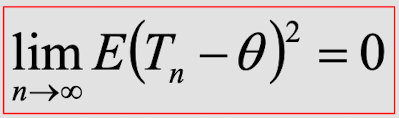

Media varianze stimatori: 0.01300704 
Lo stimatore `e consistente in media quadratica


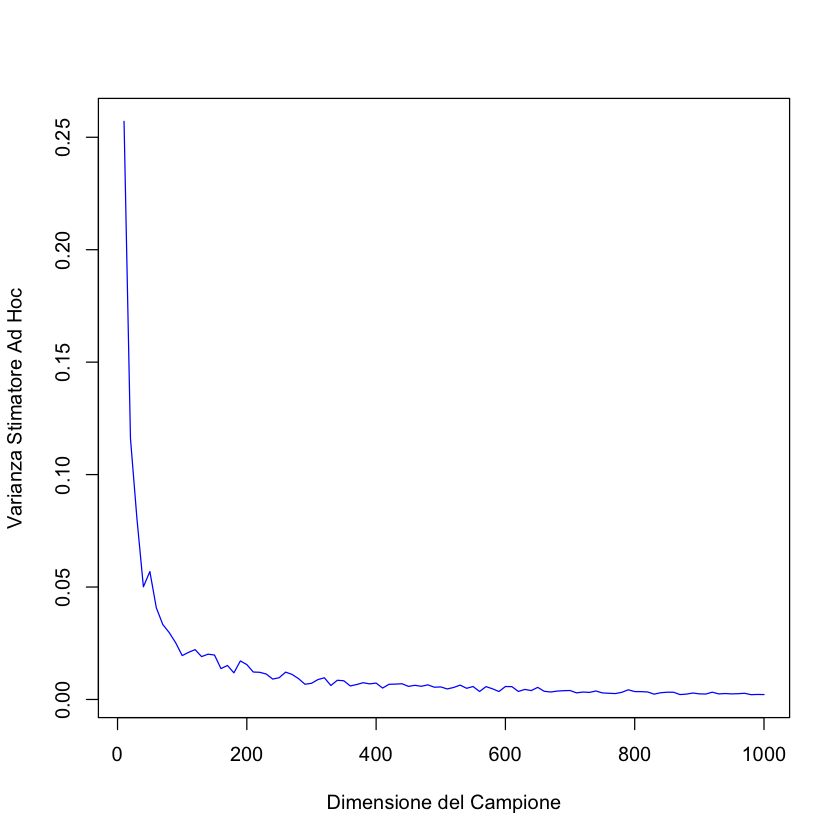

In [7]:
par(bg = 'white')
# Inizializziamo un vettore per memorizzare le varianze
varianze_stimatori_adhoc <- numeric(length(dimensioni_campioni))

# Simuliamo il processo di campionamento e calcoliamo le varianze degli stimatori ad hoc
for (i in seq_along(dimensioni_campioni)) {
  n <- dimensioni_campioni[i]
  
  simulazioni <- replicate(num_simulazioni, {
    campione <- rnorm(n, mean = media_vera, sd = deviazione_standard)
    stimatore_adhoc(campione, 3)
  })
  
  # Calcoliamo la varianza degli stimatori per ciascuna dimensione del campione
  varianze_stimatori_adhoc[i] <- var(simulazioni)
}

cat("Media varianze stimatori:", mean(varianze_stimatori_adhoc), "\n")
# Teoricamente il valore dovrebbe essere zero, ma dato che e' molto prossimo
# possiamo considerare lo stimatore consistente in media quadratica
if(mean(varianze_stimatori_adhoc) <= 0.1){
  cat("Lo stimatore è consistente in media quadratica\n")
}
# mean(varianze_stimatori_adhoc)

# Visualizziamo il comportamento della varianza dello stimatore al variare della dimensione del campione
plot(dimensioni_campioni, varianze_stimatori_adhoc, 
     type = 'l', col = 'blue', 
     xlab = 'Dimensione del Campione', 
     ylab = 'Varianza Stimatore Ad Hoc')

## <span style="color:#e6550d">Consistenza in Probabilita'</span>

![Screenshot 2023-12-31 at 15.22.51.png](<attachment:Screenshot 2023-12-31 at 15.22.51.png>)
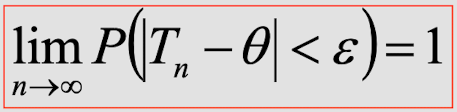

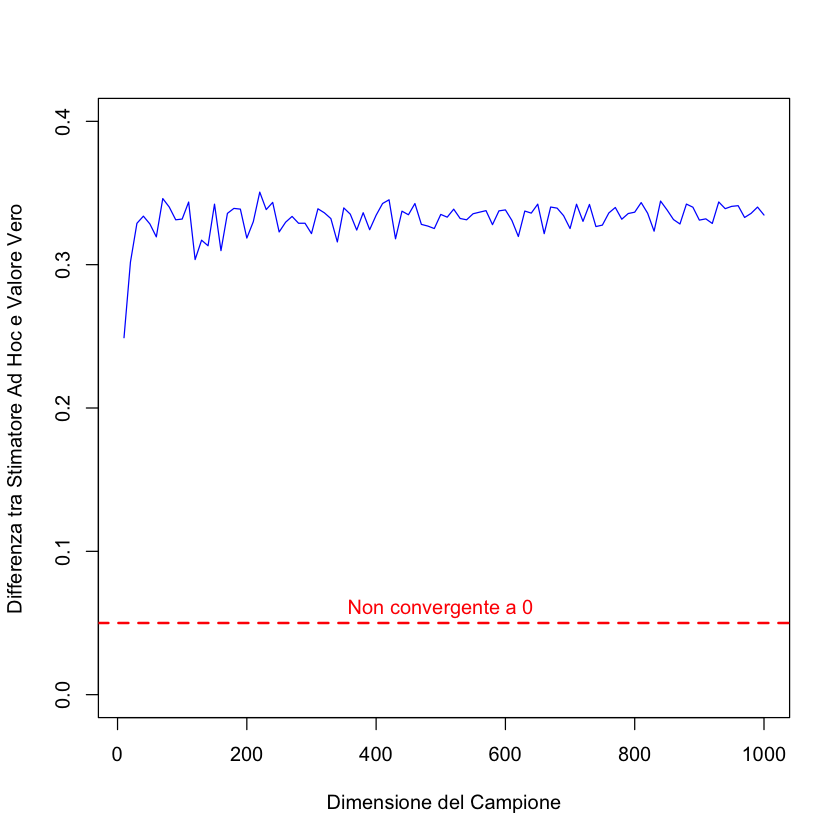

In [8]:
par(bg = 'white')
# Consistenza in probabilità con epsilon = 0.05

# Valore di epsilon
epsilon <- 0.05

# Inizializziamo un vettore per memorizzare le differenze tra stimatore ad hoc e valore vero
differenze_stimatori_adhoc <- numeric(length(dimensioni_campioni))

# Simuliamo il processo di campionamento e calcoliamo le differenze tra stimatore ad hoc e valore vero
for (i in seq_along(dimensioni_campioni)) {
  n <- dimensioni_campioni[i]
  
  simulazioni <- replicate(num_simulazioni, {
    campione <- rnorm(n, mean = media_vera, sd = deviazione_standard)
    stimatore_adhoc(campione, 3)
  })
  
  # Calcoliamo la differenza tra stimatore ad hoc e valore vero per ciascuna dimensione del campione
  differenze_stimatori_adhoc[i] <- abs(mean(simulazioni) - media_vera)
}

# Verifichiamo se la differenza converge a zero all'aumentare delle dimensioni del campione
convergenza_zero <- all(differenze_stimatori_adhoc < epsilon)

convergenza <- sum(differenze_stimatori_adhoc < epsilon)

# Visualizziamo il comportamento della differenza al variare della dimensione del campione
plot(dimensioni_campioni, differenze_stimatori_adhoc, 
     type = 'l', col = 'blue', 
     xlab = 'Dimensione del Campione', 
     ylab = 'Differenza tra Stimatore Ad Hoc e Valore Vero',
     ylim=c(0, 0.4))

# Aggiungiamo una linea orizzontale a epsilon per visualizzare il valore di soglia
abline(h = epsilon, col = 'red', lty = 2, lw = 2)

# Aggiungiamo un'annotazione sulla convergenza a zero
if (convergenza_zero) {
  text(500, epsilon + 0.01, "Convergenza a 0", col = 'green')
} else {
  text(500, epsilon + 0.01, "Non convergente a 0", col = 'red')
}

## <span style="color:#e6550d">Normalita' Asintotica</span>

![Screenshot 2023-12-31 at 15.23.11.png](<attachment:Screenshot 2023-12-31 at 15.23.11.png>)
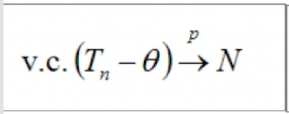

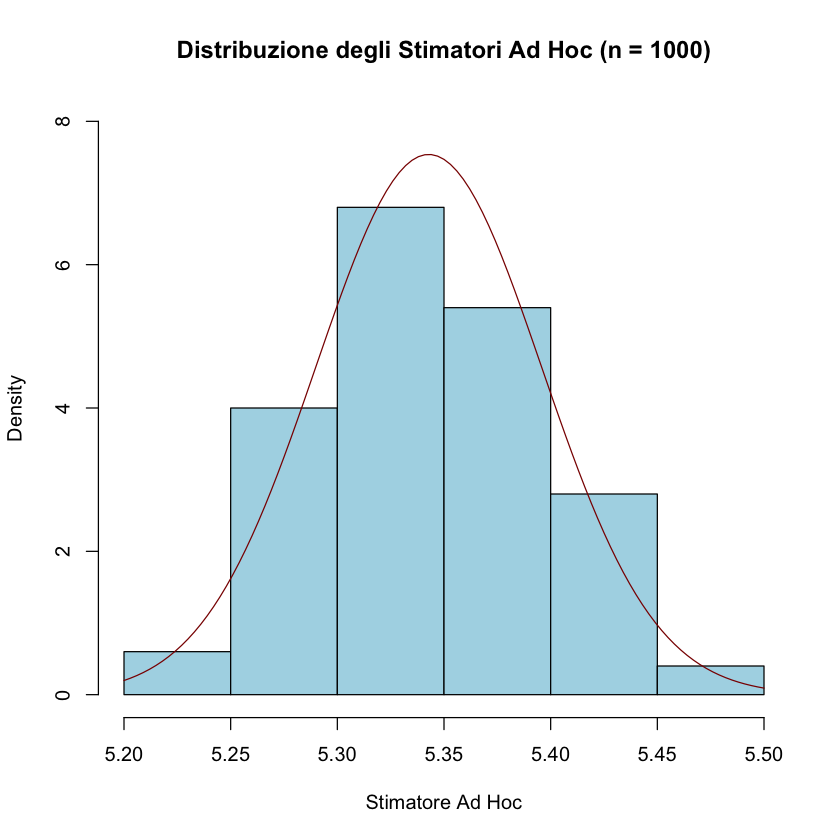

In [9]:
par(bg = 'white')
# Dimensioni del campione sufficientemente grandi
n_asintotico <- 1000

# Simuliamo il processo di campionamento per una dimensione del campione sufficientemente grande
simulazioni_asintotiche <- replicate(num_simulazioni, {
  campione <- rnorm(n_asintotico, mean = media_vera, 
        sd = deviazione_standard)
  stimatore_adhoc(campione, 3)
})

# Verifichiamo la normalità asintotica
hist(simulazioni_asintotiche, 
     main = "Distribuzione degli Stimatori Ad Hoc (n = 1000)", 
     col = 'lightblue', xlab = 'Stimatore Ad Hoc',
     probability = T, ylim = c(0, 8))

# Aggiungiamo una curva normale per confronto
curve(dnorm(x, mean = mean(simulazioni_asintotiche), 
            sd = sd(simulazioni_asintotiche)), 
      col = 'darkred', add = TRUE)